In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import random

In [3]:
# Importing birth rate data
birthData = pd.read_csv("Datasets/Birth_Rate_clean.csv")
birthData.tail()

,Data Series,2022 Dec,2022 Nov,2022 Oct,2022 Sep,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,...,1960 Oct,1960 Sep,1960 Aug,1960 Jul,1960 Jun,1960 May,1960 Apr,1960 Mar,1960 Feb,1960 Jan
10,Total Female Live-Births By Ethnic Group,1422,1452,1506,1539,1458,1426,1379,1420,1306,...,2754,2478,2583,2547,2451,2586,2388,2396,2166,2360
11,Malays,308,323,333,363,319,287,330,320,331,...,474,441,472,426,413,432,393,418,402,394
12,Chinese,825,797,856,869,799,831,748,831,705,...,2013,1754,1856,1848,1794,1910,1776,1756,1523,1701
13,Indians,158,182,161,163,150,173,155,142,154,...,218,243,200,218,210,196,179,178,192,227
14,Other Ethnic Groups,131,150,156,144,190,135,146,127,116,...,49,40,55,55,34,48,40,44,49,38


In [4]:
# Data cleaning
# Update index name
birthData = birthData.rename(columns = {'Data Series':'Date'})
birthData.set_index('Date',inplace=True)
birthData = birthData.rename(columns=lambda x: x.strip())
birthData.columns = pd.DatetimeIndex(birthData.columns).to_period('M')
# birthData.head()

# Switch rows and columns (Tranpose)
birthData = birthData.T
birthData = birthData.rename(columns=lambda x: x.strip())
birthData = birthData.sort_index()
birthData.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 756 entries, 1960-01 to 2022-12
Freq: M
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Total Live-Births By Ethnic Group         756 non-null    int64
 1   Malays                                    756 non-null    int64
 2   Chinese                                   756 non-null    int64
 3   Indians                                   756 non-null    int64
 4   Other Ethnic Groups                       756 non-null    int64
 5   Total Male Live-Births By Ethnic Group    756 non-null    int64
 6   Malays                                    756 non-null    int64
 7   Chinese                                   756 non-null    int64
 8   Indians                                   756 non-null    int64
 9   Other Ethnic Groups                       756 non-null    int64
 10  Total Female Live-Births By Ethnic Group  7

<AxesSubplot:>

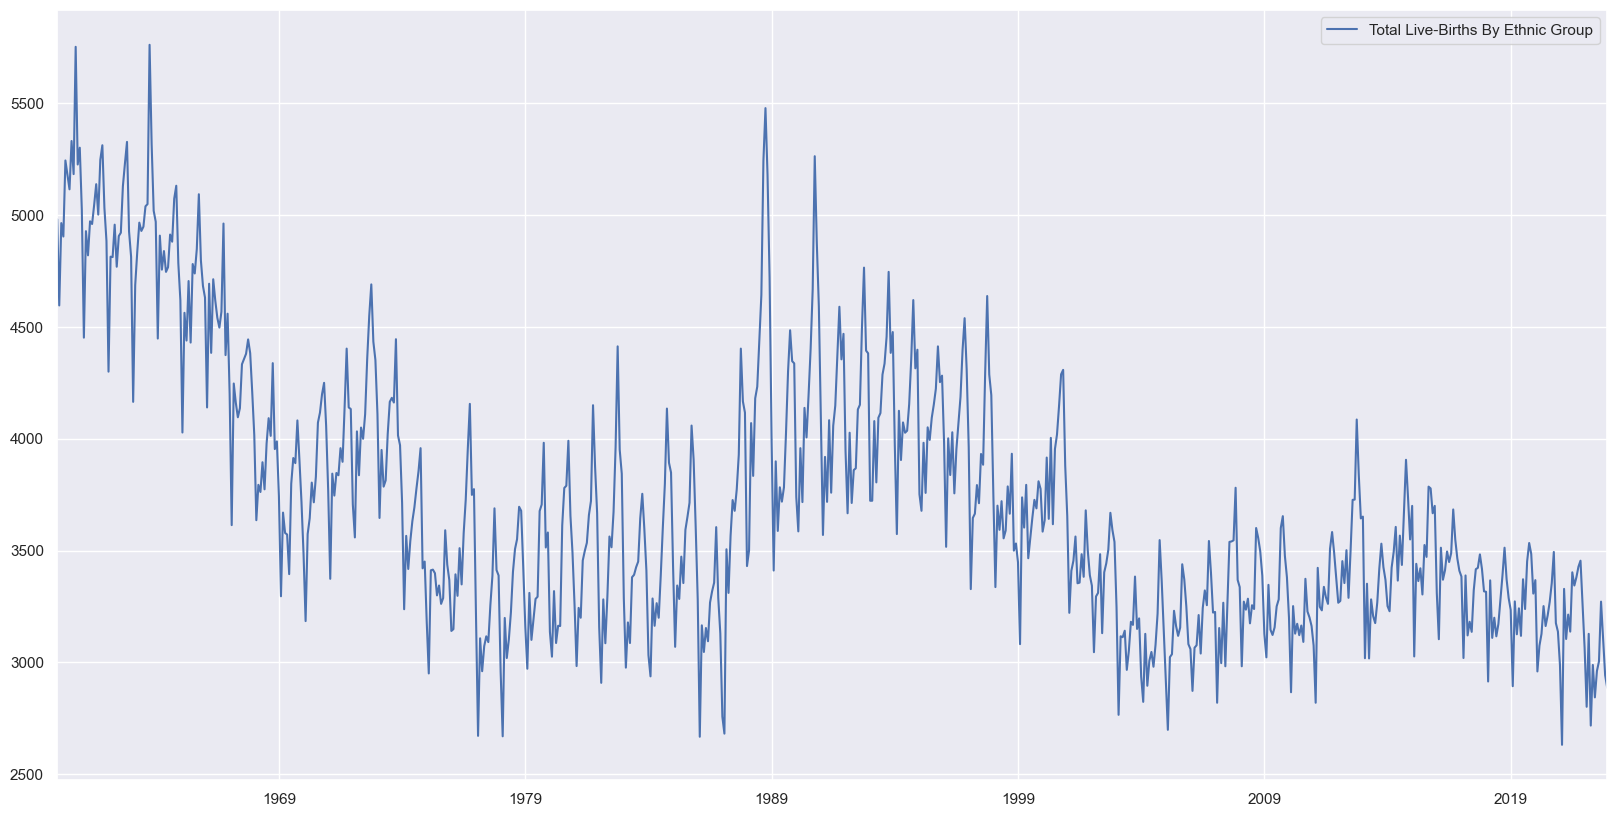

In [5]:
babies = pd.DataFrame(birthData['Total Live-Births By Ethnic Group'])

babies.head()
babies = babies.astype('int64')
babies.plot(figsize=(20, 10))

## Variable: Marriage Age

- Standardized the date to `YYYY-MM` following the date format for the birth count dataset

In [23]:
# Variable: Marriage Age
age = pd.read_csv("Datasets/Marriage Age.csv")
age = age.rename(columns = {'Data Series':'Date'})
age = age.set_index('Date')
age = age.sort_index()
age.head()

,Resident Grooms,Resident Brides,Citizen Grooms,Citizen Brides
Date,,,,
1984,26.9,24.1,26.9,24.1
1985,27.0,24.2,26.9,24.2
1986,27.1,24.4,27.1,24.3
1987,27.5,24.7,27.5,24.7
1988,27.6,24.8,27.6,24.8


In [43]:
ageResGm = pd.DataFrame(age['Resident Grooms'])
ageResBr = pd.DataFrame(age['Resident Brides'])
ageCitGm = pd.DataFrame(age['Citizen Grooms'])
ageCitBr = pd.DataFrame(age['Citizen Brides'])

ageResGm.index = pd.to_datetime(ageResGm.index, format='%Y')
ageResBr.index = pd.to_datetime(ageResBr.index, format='%Y')
ageCitGm.index = pd.to_datetime(ageCitGm.index, format='%Y')
ageCitBr.index = pd.to_datetime(ageCitBr.index, format='%Y')

As there is insufficient data to find out exactly the median age of marriage monthly, yearly data is used to replicate for the whole of that year's months

C:\Users\Zai Qin\AppData\Local\Temp\ipykernel_6716\1367338111.py:1: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  ageResGmMonthly = ageResGm.resample('MS').pad().to_period('M')
C:\Users\Zai Qin\AppData\Local\Temp\ipykernel_6716\1367338111.py:2: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  ageResBrMonthly = ageResBr.resample('MS').pad().to_period('M')
C:\Users\Zai Qin\AppData\Local\Temp\ipykernel_6716\1367338111.py:3: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  ageCitGmMonthly = ageCitGm.resample('MS').pad().to_period('M')
C:\Users\Zai Qin\AppData\Local\Temp\ipykernel_6716\1367338111.py:4: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  ageCitBrMonthly = ageCitBr.resample('MS').pad().to_period('M')


<AxesSubplot:title={'center':'Median Age of Marriages Per Month'}, xlabel='Date'>

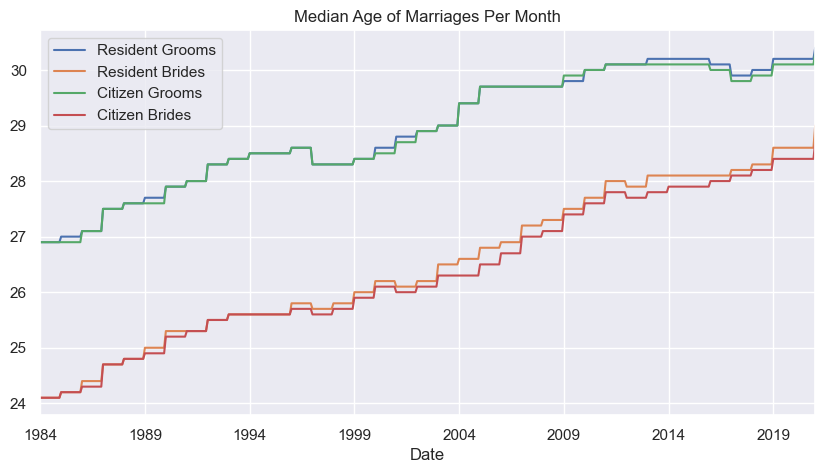

In [60]:
ageResGmMonthly = ageResGm.resample('MS').pad().to_period('M')
ageResBrMonthly = ageResBr.resample('MS').pad().to_period('M')
ageCitGmMonthly = ageCitGm.resample('MS').pad().to_period('M')
ageCitBrMonthly = ageCitBr.resample('MS').pad().to_period('M')

ageResBrMonthly = ageResGmMonthly.join(ageResBrMonthly['Resident Brides'], how='inner')
ageCitGmMonthly = ageResGmMonthly.join(ageCitGmMonthly['Citizen Grooms'], how='inner')
ageCitBrMonthly = ageResGmMonthly.join(ageCitBrMonthly['Citizen Brides'], how='inner')

ageMerge = pd.concat([ageResGmMonthly,ageResBrMonthly,ageCitGmMonthly,ageCitBrMonthly], axis=1, join='inner')
ageMerge = ageMerge.loc[:,~ageMerge.columns.duplicated(keep='first')]
ageMerge.plot(figsize=(10, 5), title='Median Age of Marriages Per Month')

<AxesSubplot:>

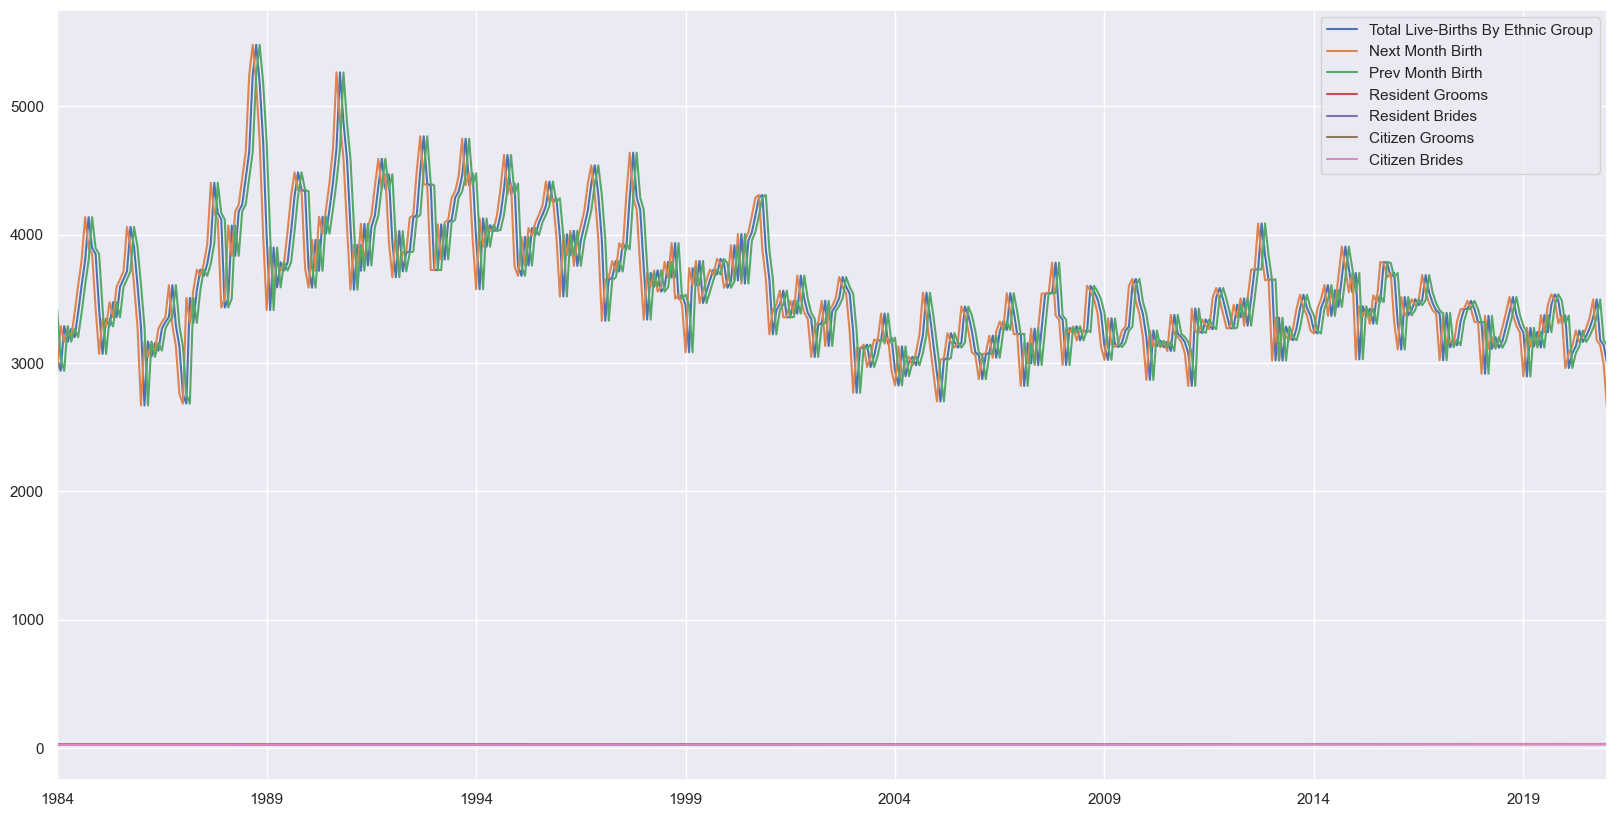

In [45]:
ageBaby = pd.DataFrame(birthData['Total Live-Births By Ethnic Group'])
ageBaby['Next Month Birth'] = ageBaby['Total Live-Births By Ethnic Group'].shift(-1)
ageBaby['Prev Month Birth'] = ageBaby['Total Live-Births By Ethnic Group'].shift(1)

ageResGmMonthly = ageBaby.join(ageResGmMonthly['Resident Grooms'], how='inner')
ageResBrMonthly = ageBaby.join(ageResBrMonthly['Resident Brides'], how='inner')
ageCitGmMonthly = ageBaby.join(ageCitGmMonthly['Citizen Grooms'], how='inner')
ageCitBrMonthly = ageBaby.join(ageCitBrMonthly['Citizen Brides'], how='inner')

ageMerge = pd.concat([ageResGmMonthly,ageResBrMonthly,ageCitGmMonthly,ageCitBrMonthly], axis=1, join='inner')
ageMerge = ageMerge.loc[:,~ageMerge.columns.duplicated(keep='first')]
ageMerge.plot(figsize=(20, 10))

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 445 entries, 1984-01 to 2021-01
Freq: M
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Live-Births By Ethnic Group  445 non-null    int64  
 1   Next Month Birth                   445 non-null    float64
 2   Prev Month Birth                   445 non-null    float64
 3   Resident Grooms                    445 non-null    float64
 4   Resident Brides                    445 non-null    float64
 5   Citizen Grooms                     445 non-null    float64
 6   Citizen Brides                     445 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 44.0 KB


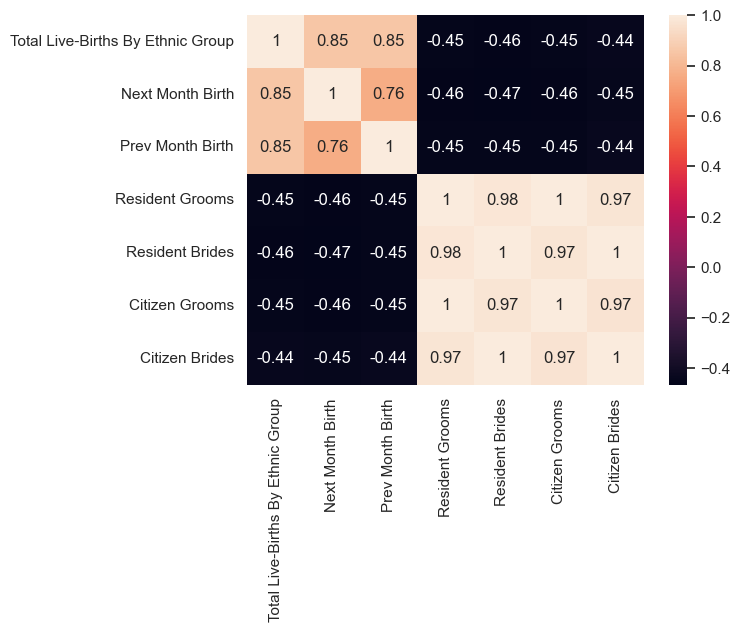

In [46]:
ageMerge.info()
ageMerge.corr()
corr_matrix = ageMerge.corr()
sb.heatmap(corr_matrix, annot=True)
plt.show()

## Analysis
- All variables showed similar correlation to the birth rate, thus all variables are retained for analysis

In [47]:
ageUpdate = pd.concat([ageResGmMonthly,ageResBrMonthly,ageCitGmMonthly,ageCitBrMonthly], axis=1, join='inner')
ageUpdate = ageUpdate.loc[:,~ageUpdate.columns.duplicated(keep='first')]
ageUpdate.info()
ageUpdate.corr()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 445 entries, 1984-01 to 2021-01
Freq: M
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Live-Births By Ethnic Group  445 non-null    int64  
 1   Next Month Birth                   445 non-null    float64
 2   Prev Month Birth                   445 non-null    float64
 3   Resident Grooms                    445 non-null    float64
 4   Resident Brides                    445 non-null    float64
 5   Citizen Grooms                     445 non-null    float64
 6   Citizen Brides                     445 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 44.0 KB


,Total Live-Births By Ethnic Group,Next Month Birth,Prev Month Birth,Resident Grooms,Resident Brides,Citizen Grooms,Citizen Brides
Total Live-Births By Ethnic Group,1.000000,0.854869,0.854077,-0.454849,-0.458920,-0.454332,-0.441418
Next Month Birth,0.854869,1.000000,0.764010,-0.460426,-0.466320,-0.459224,-0.448350
Prev Month Birth,0.854077,0.764010,1.000000,-0.449486,-0.452875,-0.449632,-0.435742
Resident Grooms,-0.454849,-0.460426,-0.449486,1.000000,0.978604,0.998817,0.973217
Resident Brides,-0.458920,-0.466320,-0.452875,0.978604,1.000000,0.972164,0.998626
Citizen Grooms,-0.454332,-0.459224,-0.449632,0.998817,0.972164,1.000000,0.966552
Citizen Brides,-0.441418,-0.448350,-0.435742,0.973217,0.998626,0.966552,1.000000


## Classification: Random Forest vs Logistic Regression
- Goal: From the available variables this month, predict the rise/fall of the next month's birth rate
- Available Data:
    - Current/Prev Month Birth Count
    - Resident Grooms/Resident Brides/Citizen Grooms/Citizen Brides
    
## Performance Evaluation Technique: K-Fold vs Leave-One-Out
- Leave-one-out too computational expensive, going for K-Fold instead
- Since dataset is small (About 300+ data points), use a smaller fold number (3)
- This gives about 100+ data points for each fold

## Classification Model Performance Metrics
- Accuracy:  Number of correct predictions
- Precision: Proportion of true positives out of all positive predictions
- Recall:    Proportion of true positives out of all actual positive cases
- F1 Score:  Harmonic mean of precision and recall

In [49]:
# Step 1: Create binary target variable
ageUpdate['Rise-Fall'] = (ageUpdate['Total Live-Births By Ethnic Group'] > ageUpdate['Next Month Birth']).astype(int)

In [50]:
resultsRf = []

for i in range(100):
    # Defining number of folds for cross-validation
    num_folds = 3
    
    # Defining random seed
    seed = random.randint(0, 100000)
       
    # Step 2: Combine features into single dataframe
    # Step 2.1: Predictors
    X = ageUpdate[['Total Live-Births By Ethnic Group',
                   'Prev Month Birth', 'Resident Grooms', 'Resident Brides', 'Citizen Grooms', 'Citizen Brides']]

    # Step 2.2: Response
    y = ageUpdate['Rise-Fall']
    
    # Step 3: Creating KFold
    kResRf = []
    kf = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Step 4: Loop over folds
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        # Step 4.1: Split data into training and test sets
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Step 4.2: Creating Random Forest and Logistic Regression Classifier
        rf = RandomForestClassifier(max_depth=10)
        
        # Step 4.3: Fit model to training data
        rf.fit(X_train, y_train)
        
        # Step 4.4: Make predictions on test data
        y_pred_rf = rf.predict(X_test)
        
        # Step 4.5: Evalute performance
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        precision_rf = precision_score(y_test, y_pred_rf)
        recall_rf = recall_score(y_test, y_pred_rf)
        f1_rf = f1_score(y_test, y_pred_rf)
        
        kResRf.append((fold, accuracy_rf, precision_rf, recall_rf, f1_rf))
        
    # Step 6: Compute the mean and standard deviation of the performance metrics across all folds
    acc_mean_rf, acc_std_rf = np.mean([r[1] for r in kResRf]), np.std([r[1] for r in kResRf])
    prec_mean_rf, prec_std_rf = np.mean([r[2] for r in kResRf]), np.std([r[2] for r in kResRf])
    rec_mean_rf, rec_std_rf = np.mean([r[3] for r in kResRf]), np.std([r[3] for r in kResRf])
    f1_mean_rf, f1_std_rf = np.mean([r[4] for r in kResRf]), np.std([r[4] for r in kResRf])
    
    resultsRf.append((seed, acc_mean_rf, acc_std_rf, prec_mean_rf, prec_std_rf, rec_mean_rf, rec_std_rf, f1_mean_rf, f1_std_rf))

# Sort results by F1 score in descending order
resultsRf.sort(key=lambda x: x[7], reverse=True)

In [51]:
resultsLr = []

for i in range(5):
    seed = resultsRf[i][0]
    kResLr = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        lr = LogisticRegression(max_iter=1000, solver='liblinear')
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        
        accuracy_lr = accuracy_score(y_test, y_pred_lr)
        precision_lr = precision_score(y_test, y_pred_lr)
        recall_lr = recall_score(y_test, y_pred_lr)
        f1_lr = f1_score(y_test, y_pred_lr)
        kResLr.append((fold, accuracy_lr, precision_lr, recall_lr, f1_lr))
        
    acc_mean_lr, acc_std_lr = np.mean([r[1] for r in kResLr]), np.std([r[1] for r in kResLr])
    prec_mean_lr, prec_std_lr = np.mean([r[2] for r in kResLr]), np.std([r[2] for r in kResLr])
    rec_mean_lr, rec_std_lr = np.mean([r[3] for r in kResLr]), np.std([r[3] for r in kResLr])
    f1_mean_lr, f1_std_lr = np.mean([r[4] for r in kResLr]), np.std([r[4] for r in kResLr])   
    resultsLr.append((seed, acc_mean_lr, acc_std_lr, prec_mean_lr, prec_std_lr, rec_mean_lr, rec_std_lr, f1_mean_lr, f1_std_lr))

In [52]:
topResultsRf = resultsRf[:5]

for i in range(5):
    print('----------------------------------------------')
    print(f"Random state {topResultsRf[i][0]}:")
    print(f'Accuracy  = {topResultsRf[i][1]:.4f} +/- {topResultsRf[i][2]:.4f}  vs  {resultsLr[i][1]:.4f} +/- {resultsLr[i][2]:.4f}')
    print(f'Precision = {topResultsRf[i][3]:.4f} +/- {topResultsRf[i][4]:.4f}  vs  {resultsLr[i][3]:.4f} +/- {resultsLr[i][4]:.4f}')
    print(f'Recall    = {topResultsRf[i][5]:.4f} +/- {topResultsRf[i][6]:.4f}  vs  {resultsLr[i][5]:.4f} +/- {resultsLr[i][6]:.4f}')
    print(f'F1 score  = {topResultsRf[i][7]:.4f} +/- {topResultsRf[i][8]:.4f}  vs  {resultsLr[i][7]:.4f} +/- {resultsLr[i][8]:.4f}')
print('----------------------------------------------')

----------------------------------------------
Random state 65835:
Accuracy  = 0.7147 +/- 0.0220  vs  0.5867 +/- 0.0506
Precision = 0.7076 +/- 0.0604  vs  0.5873 +/- 0.0937
Recall    = 0.7044 +/- 0.0701  vs  0.5473 +/- 0.0286
F1 score  = 0.7017 +/- 0.0322  vs  0.5607 +/- 0.0389
----------------------------------------------
Random state 59428:
Accuracy  = 0.7101 +/- 0.0102  vs  0.5867 +/- 0.0506
Precision = 0.7054 +/- 0.0082  vs  0.5873 +/- 0.0937
Recall    = 0.6826 +/- 0.0360  vs  0.5473 +/- 0.0286
F1 score  = 0.6932 +/- 0.0170  vs  0.5607 +/- 0.0389
----------------------------------------------
Random state 91347:
Accuracy  = 0.7078 +/- 0.0285  vs  0.5867 +/- 0.0506
Precision = 0.7097 +/- 0.0580  vs  0.5873 +/- 0.0937
Recall    = 0.6726 +/- 0.0188  vs  0.5473 +/- 0.0286
F1 score  = 0.6890 +/- 0.0262  vs  0.5607 +/- 0.0389
----------------------------------------------
Random state 56783:
Accuracy  = 0.6944 +/- 0.0525  vs  0.5867 +/- 0.0506
Precision = 0.6802 +/- 0.0203  vs  0.5873 +

In [53]:
print(f'Average Accuracy:  {sum([i[1] for i in topResultsRf])/5:.4f}  vs  {sum([i[1] for i in resultsLr])/5:.4f}')
print(f'Average Precision: {sum([i[3] for i in topResultsRf])/5:.4f}  vs  {sum([i[3] for i in resultsLr])/5:.4f}')
print(f'Average Recall:    {sum([i[5] for i in topResultsRf])/5:.4f}  vs  {sum([i[5] for i in resultsLr])/5:.4f}')
print(f'Average F1 Score:  {sum([i[7] for i in topResultsRf])/5:.4f}  vs  {sum([i[7] for i in resultsLr])/5:.4f}')

Average Accuracy:  0.7038  vs  0.5867
Average Precision: 0.6960  vs  0.5873
Average Recall:    0.6872  vs  0.5473
Average F1 Score:  0.6897  vs  0.5607


## Final Verdict on Models
The logistic regression has been constanly doing worse than the random forest, despite using the same seed and after testing with different number of variables

Conclusion: Random forest is the better model in this case

In [54]:
resultsRf2 = []

for i in range(5):
    seed = resultsRf[i][0]
       
    # Step 2: Combine features into single dataframe
    # Step 2.1: Predictors
    X = ageUpdate[['Total Live-Births By Ethnic Group',
                   'Prev Month Birth', 'Resident Grooms', 'Resident Brides']]

    # Step 2.2: Response
    y = ageUpdate['Rise-Fall']
    
    # Step 3: Creating KFold
    kResRf = []
    kf = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Step 4: Loop over folds
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        # Step 4.1: Split data into training and test sets
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Step 4.2: Creating Random Forest and Logistic Regression Classifier
        rf = RandomForestClassifier(max_depth=10)
        
        # Step 4.3: Fit model to training data
        rf.fit(X_train, y_train)
        
        # Step 4.4: Make predictions on test data
        y_pred_rf = rf.predict(X_test)
        
        # Step 4.5: Evalute performance
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        precision_rf = precision_score(y_test, y_pred_rf)
        recall_rf = recall_score(y_test, y_pred_rf)
        f1_rf = f1_score(y_test, y_pred_rf)
        
        kResRf.append((fold, accuracy_rf, precision_rf, recall_rf, f1_rf))
        
    # Step 6: Compute the mean and standard deviation of the performance metrics across all folds
    acc_mean_rf, acc_std_rf = np.mean([r[1] for r in kResRf]), np.std([r[1] for r in kResRf])
    prec_mean_rf, prec_std_rf = np.mean([r[2] for r in kResRf]), np.std([r[2] for r in kResRf])
    rec_mean_rf, rec_std_rf = np.mean([r[3] for r in kResRf]), np.std([r[3] for r in kResRf])
    f1_mean_rf, f1_std_rf = np.mean([r[4] for r in kResRf]), np.std([r[4] for r in kResRf])
    
    resultsRf2.append((seed, acc_mean_rf, acc_std_rf, prec_mean_rf, prec_std_rf, rec_mean_rf, rec_std_rf, f1_mean_rf, f1_std_rf))

In [55]:
resultsRf3 = []

for i in range(5):
    seed = resultsRf[i][0]
       
    # Step 2: Combine features into single dataframe
    # Step 2.1: Predictors
    X = ageUpdate[['Total Live-Births By Ethnic Group',
                   'Prev Month Birth', 'Citizen Grooms', 'Citizen Brides']]

    # Step 2.2: Response
    y = ageUpdate['Rise-Fall']
    
    # Step 3: Creating KFold
    kResRf = []
    kf = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Step 4: Loop over folds
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        # Step 4.1: Split data into training and test sets
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Step 4.2: Creating Random Forest and Logistic Regression Classifier
        rf = RandomForestClassifier(max_depth=10)
        
        # Step 4.3: Fit model to training data
        rf.fit(X_train, y_train)
        
        # Step 4.4: Make predictions on test data
        y_pred_rf = rf.predict(X_test)
        
        # Step 4.5: Evalute performance
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        precision_rf = precision_score(y_test, y_pred_rf)
        recall_rf = recall_score(y_test, y_pred_rf)
        f1_rf = f1_score(y_test, y_pred_rf)
        
        kResRf.append((fold, accuracy_rf, precision_rf, recall_rf, f1_rf))
        
    # Step 6: Compute the mean and standard deviation of the performance metrics across all folds
    acc_mean_rf, acc_std_rf = np.mean([r[1] for r in kResRf]), np.std([r[1] for r in kResRf])
    prec_mean_rf, prec_std_rf = np.mean([r[2] for r in kResRf]), np.std([r[2] for r in kResRf])
    rec_mean_rf, rec_std_rf = np.mean([r[3] for r in kResRf]), np.std([r[3] for r in kResRf])
    f1_mean_rf, f1_std_rf = np.mean([r[4] for r in kResRf]), np.std([r[4] for r in kResRf])
    
    resultsRf3.append((seed, acc_mean_rf, acc_std_rf, prec_mean_rf, prec_std_rf, rec_mean_rf, rec_std_rf, f1_mean_rf, f1_std_rf))

In [56]:
print(f'Average Accuracy:  {sum([i[1] for i in topResultsRf])/5:.4f}  \
      vs  {sum([i[1] for i in resultsRf2])/5:.4f} \
      vs  {sum([i[1] for i in resultsRf3])/5:.4f}')
print(f'Average Precision: {sum([i[3] for i in topResultsRf])/5:.4f}  \
      vs  {sum([i[3] for i in resultsRf2])/5:.4f} \
      vs  {sum([i[3] for i in resultsRf3])/5:.4f}')
print(f'Average Recall:    {sum([i[5] for i in topResultsRf])/5:.4f}  \
      vs  {sum([i[5] for i in resultsRf2])/5:.4f} \
      vs  {sum([i[5] for i in resultsRf3])/5:.4f}')
print(f'Average F1 Score:  {sum([i[7] for i in topResultsRf])/5:.4f}  \
      vs  {sum([i[7] for i in resultsRf2])/5:.4f} \
      vs  {sum([i[7] for i in resultsRf3])/5:.4f}')

Average Accuracy:  0.7038        vs  0.6863       vs  0.6944
Average Precision: 0.6960        vs  0.6753       vs  0.6851
Average Recall:    0.6872        vs  0.6794       vs  0.6793
Average F1 Score:  0.6897        vs  0.6741       vs  0.6800


## Accuracy
1. All
2. Resident Brides and Grooms
3. Citizen Brides and Grooms

## Precision
1. All
2. Resident Brides and Grooms
3. Citizen Brides and Grooms

## Recall
1. All
2. Resident Brides and Grooms
3. Citizen Brides and Grooms

## F1 Score
1. All
2. Resident Brides and Grooms
3. Citizen Brides and Grooms

## Final Verdict on Variables
Overall, keeping all variables gives the best model
- Keeping the both residents and citizens as a factor yields higher correlation

As for the other 2
- Having either the residents or citizens by themselves yield lower correlation

Conclusion: Keep and all of its components to obtain best model